<a href="https://colab.research.google.com/github/NoamTene/Udemy/blob/master/Udemy9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express  as px
import math

from matplotlib import cm
plt.style.use('ggplot')

In [2]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 6, 12

The following raw github is a frozen version of https://www.kaggle.com/andrewmvd/udemy-courses/download.  We believe that this file is just a small sample of all Udemy offerings but have chosen to use it as a snapshot of older course stats so we can compare them with more recent values and see if and how they changed.

In [3]:
df1 = pd.read_csv('https://raw.githubusercontent.com/NoamTene/Udemy/master/datasets_646598_1162286_udemy_courses.csv')
print(df1.shape)
df1.count()

(3678, 12)


course_id              3678
course_title           3678
url                    3678
is_paid                3678
price                  3678
num_subscribers        3678
num_reviews            3678
num_lectures           3678
level                  3678
content_duration       3678
published_timestamp    3678
subject                3678
dtype: int64

In [4]:
df1.drop_duplicates(inplace=True)
print(df1.shape)
df1.count()

(3672, 12)


course_id              3672
course_title           3672
url                    3672
is_paid                3672
price                  3672
num_subscribers        3672
num_reviews            3672
num_lectures           3672
level                  3672
content_duration       3672
published_timestamp    3672
subject                3672
dtype: int64

The following file was generated by David Margulis for a Class project presumably using the code in UdemyDavid_MakeNewSnapshot_TRY.ipynb within this github repository.  David has edited the text manually before passing it on to this frozen version.

In [5]:
df2= pd.read_csv('https://raw.githubusercontent.com/NoamTene/Udemy/master/Rates_9July_new.csv')
print(df2.shape)
df2.count()

(3678, 15)


CourseID       3678
ReadStat       3678
Rate1          2670
Rate2          2670
Rate3          2670
Rate4          2670
Rate5          2670
Sum            2670
NewEnrolled    2724
UpdateDate     3668
Upd_monthes    2424
Orig_Price     2599
Curr_Price     2599
Discount       2599
Time           3668
dtype: int64

In [6]:
df2.drop_duplicates(subset='CourseID',inplace=True)
df2.count()

CourseID       3672
ReadStat       3672
Rate1          2666
Rate2          2666
Rate3          2666
Rate4          2666
Rate5          2666
Sum            2666
NewEnrolled    2720
UpdateDate     3662
Upd_monthes    2420
Orig_Price     2595
Curr_Price     2595
Discount       2595
Time           3662
dtype: int64

In [7]:
df1.sample(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3183,866460,Angular 2+ with Typescript - Essential Training,https://www.udemy.com/angular-2-training/,True,195,29348,780,66,Beginner Level,3.0,2016-11-29T04:08:03Z,Web Development
1388,673142,master course - realistisch zeichnen lernen,https://www.udemy.com/realistisch-zeichnen-ler...,True,20,280,46,33,All Levels,5.0,2016-02-10T00:25:00Z,Graphic Design
1373,52457,The Logo Design Process From Start To Finish,https://www.udemy.com/the-logo-design-process-...,True,95,2361,74,40,All Levels,5.5,2013-09-24T03:52:32Z,Graphic Design
3206,405282,PHP for Beginners -Become a PHP Master - Proje...,https://www.udemy.com/php-for-complete-beginne...,True,200,28880,4316,286,All Levels,30.5,2015-02-14T00:54:08Z,Web Development
633,1179546,An Introduction to Financial Markets on Wall S...,https://www.udemy.com/an-introduction-to-finan...,True,30,7,1,29,All Levels,2.0,2017-04-28T00:08:38Z,Business Finance


In [8]:
df2.sample(5)

,CourseID,ReadStat,Rate1,Rate2,Rate3,Rate4,Rate5,Sum,NewEnrolled,UpdateDate,Upd_monthes,Orig_Price,Curr_Price,Discount,Time
27,447362,OK,16.0,26.0,64.0,154.0,336.0,596.0,7424.0,6/2019,13.0,699.99,419.99,40.0,2020-07-09 13:34:54
2476,218856,OK,0.0,0.0,0.0,0.0,1.0,1.0,14.0,5/2014,74.0,199.99,119.99,40.0,2020-07-09 15:44:52
2237,1040596,OK,0.0,0.0,0.0,0.0,3.0,3.0,54.0,10/2017,33.0,NaN,NaN,NaN,2020-07-09 15:31:39
2293,476000,OK,5.0,2.0,6.0,15.0,31.0,59.0,531.0,9/2015,58.0,459.99,275.99,40.0,2020-07-09 15:33:43
1590,403764,OK,1.0,0.0,1.0,3.0,6.0,11.0,544.0,0/0,NaN,239.99,143.99,40.0,2020-07-09 14:42:24


Sanity check: Verify that Sum is redundant.

In [9]:
df2[(df2.Rate1+df2.Rate2+df2.Rate3+df2.Rate4+df2.Rate5!=df2.Sum)  & (df2.Sum==df2.Sum)] 

,CourseID,ReadStat,Rate1,Rate2,Rate3,Rate4,Rate5,Sum,NewEnrolled,UpdateDate,Upd_monthes,Orig_Price,Curr_Price,Discount,Time


Sanity check: Verify that df1.is_paid is redundant

In [10]:
df1[(df1.is_paid)^(df1.price!=0)] 

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


Change column names to make them consistent prior to Join.

In [11]:
df2.columns=['course_id','status','rating1','rating2','rating3','rating4','rating5','rating_tot','new_subscribers','new_pub_date','upd_month','new_price','curr_price','discount','timestamp']
df1.columns=['course_id','title','url','is_paid','old_price','old_subscribers','num_reviews','num_lectures','level','duration','old_pub_date','subject']

In [12]:
df = df1.join(df2.set_index('course_id'),on='course_id')

In [13]:
print(df1.shape)
print(df2.shape)
print(df.shape)
df.columns

(3672, 12)
(3672, 15)
(3672, 26)


Index(['course_id', 'title', 'url', 'is_paid', 'old_price', 'old_subscribers',
       'num_reviews', 'num_lectures', 'level', 'duration', 'old_pub_date',
       'subject', 'status', 'rating1', 'rating2', 'rating3', 'rating4',
       'rating5', 'rating_tot', 'new_subscribers', 'new_pub_date', 'upd_month',
       'new_price', 'curr_price', 'discount', 'timestamp'],
      dtype='object')

Some columns in df2 are nan or null.  Count how many valid entries there are in each column

In [14]:
df.count()

course_id          3672
title              3672
url                3672
is_paid            3672
old_price          3672
old_subscribers    3672
num_reviews        3672
num_lectures       3672
level              3672
duration           3672
old_pub_date       3672
subject            3672
status             3672
rating1            2666
rating2            2666
rating3            2666
rating4            2666
rating5            2666
rating_tot         2666
new_subscribers    2720
new_pub_date       3662
upd_month          2420
new_price          2595
curr_price         2595
discount           2595
timestamp          3662
dtype: int64

In [15]:
df['old_revenue']  = df.old_price*df.old_subscribers
df['new_revenue']  = df.new_price*df.new_subscribers
df['hours_watched'] = df.num_lectures*df.old_subscribers
df['price_per_lecture']   = df.old_price/df.num_lectures

In [16]:
dfc = df[~np.isnan(df.new_subscribers) & ~np.isnan(df.new_price)].copy()
dfc.shape

(2592, 30)

Note: the intersection of
      2720 rows with valid new_subscribers and 
      2595 rows with valid new_price
results in 2592 rows.

In [17]:
new_subsTot = dfc.new_subscribers.sum()
print(new_subsTot)
old_subsTot = dfc.old_subscribers.sum()
print(old_subsTot)


24702258.0
9777804


In [18]:
dfc['new_perc_subs']  = df.new_subscribers/new_subsTot
dfc['old_perc_subs']  = df.old_subscribers/old_subsTot

In [19]:
disp_col = ['course_id', 'title', 'url', 'old_price', 
            'old_subscribers', 'num_lectures', 'level', 'subject', 
            'new_subscribers', 'new_price', 'timestamp', 
            'old_revenue', 'new_revenue', 'hours_watched', 'price_per_lecture']

In [20]:
dfc.sort_values('old_subscribers',inplace=True)
dfc['cum_old_subsc']=np.cumsum(dfc.old_subscribers)/old_subsTot
dfc[1700:1705][['cum_old_subsc']+disp_col]

,cum_old_subsc,course_id,title,url,old_price,old_subscribers,num_lectures,level,subject,new_subscribers,new_price,timestamp,old_revenue,new_revenue,hours_watched,price_per_lecture
1366,0.099939,424770,Book Design With MS Word And Canva,https://www.udemy.com/boost-your-sales-with-di...,95,1825,33,All Levels,Graphic Design,2303.0,379.99,2020-07-09 14:30:52,173375,875116.97,60225,2.878788
3639,0.100126,261148,create a search engine for your website!,https://www.udemy.com/create-a-simple-php-mysq...,20,1832,12,Intermediate Level,Web Development,1856.0,79.99,2020-07-09 17:22:46,36640,148461.44,21984,1.666667
2632,0.100314,945336,Javascript Intermediate level 1 - Mastering th...,https://www.udemy.com/javascript-intermediate-...,100,1838,31,All Levels,Web Development,3398.0,399.99,2020-07-09 16:16:48,183800,1359166.02,56978,3.225806
3559,0.100502,882128,The Complete JavaScript Bootcamp,https://www.udemy.com/the-complete-javascript-...,195,1839,47,All Levels,Web Development,2180.0,779.99,2020-07-09 17:19:53,358605,1700378.20,86433,4.148936
1916,0.100691,132570,Basic Piano Hymn Playing,https://www.udemy.com/basic-piano-hymn-playing/,20,1842,28,Beginner Level,Musical Instruments,1976.0,79.99,2020-07-09 14:59:33,36840,158060.24,51576,0.714286


In [21]:
dfc.sort_values('new_subscribers',inplace=True)
dfc['cum_new_subsc']=np.cumsum(dfc.new_subscribers)/new_subsTot
dfc[1853:1858][['cum_new_subsc']+disp_col]

,cum_new_subsc,course_id,title,url,old_price,old_subscribers,num_lectures,level,subject,new_subscribers,new_price,timestamp,old_revenue,new_revenue,hours_watched,price_per_lecture
2279,0.099647,1244302,Guitar Strumming 101 - Have More Fun Playing S...,https://www.udemy.com/guitar-strumming-101-hav...,50,8,16,Beginner Level,Musical Instruments,5216.0,299.99,2020-07-09 15:33:13,400,1564747.84,128,3.125000
952,0.099859,793084,Succeed in Stocks Even if you Don't Know Where...,https://www.udemy.com/succeed-in-stocks-even-i...,0,2554,10,Beginner Level,Business Finance,5218.0,0.00,2020-07-09 14:07:03,0,0.00,25540,0.000000
346,0.100070,1034074,Introduction to Value Growth Investing,https://www.udemy.com/introduction-to-value-gr...,0,2768,10,All Levels,Business Finance,5225.0,0.00,2020-07-09 13:45:36,0,0.00,27680,0.000000
3124,0.100282,982860,Django + AngularJS for a Powerful Web Application,https://www.udemy.com/django-angularjs/,95,4463,36,Intermediate Level,Web Development,5232.0,379.99,2020-07-09 16:33:14,423985,1988107.68,160668,2.638889
2900,0.100494,896858,The Complete WordPress Development & Customiza...,https://www.udemy.com/the-complete-wordpress-d...,100,1611,157,Expert Level,Web Development,5240.0,799.99,2020-07-09 16:25:14,161100,4191947.60,252927,0.636943


In [22]:
new_bestseller_thr = 90000
old_bestseller_thr = 40000
low_thr_cum_perc = 0.1
def calc_cat(num,cum,best_thr,low_thr):
   return np.where(num>=best_thr, 3, np.where(cum>=low_thr,2,1))
dfc['new_cat'] = calc_cat(dfc['new_subscribers'], dfc['cum_new_subsc'], new_bestseller_thr, low_thr_cum_perc)
dfc['old_cat'] = calc_cat(dfc['old_subscribers'], dfc['cum_old_subsc'], old_bestseller_thr, low_thr_cum_perc)

In [23]:
dfc[1853:1858][['cum_new_subsc','new_cat','old_cat']+disp_col]

,cum_new_subsc,new_cat,old_cat,course_id,title,url,old_price,old_subscribers,num_lectures,level,subject,new_subscribers,new_price,timestamp,old_revenue,new_revenue,hours_watched,price_per_lecture
2279,0.099647,1,1,1244302,Guitar Strumming 101 - Have More Fun Playing S...,https://www.udemy.com/guitar-strumming-101-hav...,50,8,16,Beginner Level,Musical Instruments,5216.0,299.99,2020-07-09 15:33:13,400,1564747.84,128,3.125000
952,0.099859,1,2,793084,Succeed in Stocks Even if you Don't Know Where...,https://www.udemy.com/succeed-in-stocks-even-i...,0,2554,10,Beginner Level,Business Finance,5218.0,0.00,2020-07-09 14:07:03,0,0.00,25540,0.000000
346,0.100070,2,2,1034074,Introduction to Value Growth Investing,https://www.udemy.com/introduction-to-value-gr...,0,2768,10,All Levels,Business Finance,5225.0,0.00,2020-07-09 13:45:36,0,0.00,27680,0.000000
3124,0.100282,2,2,982860,Django + AngularJS for a Powerful Web Application,https://www.udemy.com/django-angularjs/,95,4463,36,Intermediate Level,Web Development,5232.0,379.99,2020-07-09 16:33:14,423985,1988107.68,160668,2.638889
2900,0.100494,2,1,896858,The Complete WordPress Development & Customiza...,https://www.udemy.com/the-complete-wordpress-d...,100,1611,157,Expert Level,Web Development,5240.0,799.99,2020-07-09 16:25:14,161100,4191947.60,252927,0.636943


In [24]:
dfc.to_csv('UdemyB.csv')

In [25]:
freeCrossTab=pd.crosstab(dfc['subject'],[dfc.old_price==0, dfc.new_price==0],margins=True)
freeCrossTab.to_csv('freeCrossTab.csv')
freeCrossTab

old_price           False       True        All
new_price           False True False True      
subject                                        
Business Finance      641    9    19   39   708
Graphic Design        366    8     8   16   398
Musical Instruments   473    7    12   21   513
Web Development       815   54    18   86   973
All                  2295   78    57  162  2592

In [26]:
catCrossTab=pd.crosstab(dfc['old_cat'], dfc['new_cat'],margins=True)
catCrossTab.to_csv('catCrossTab.csv')
catCrossTab

new_cat,1,2,3,All
old_cat,,,,
1,1580,120,1,1701
2,275,563,17,855
3,0,10,26,36
All,1855,693,44,2592


In [27]:
catCrossTab0 = pd.crosstab(dfc['subject'],[dfc['old_cat'],dfc['new_cat']],margins=True)
catCrossTab0.to_csv('catCrossTab0.csv')
catCrossTab0

old_cat                 1            2            3       All
new_cat                 1    2  3    1    2   3   2   3      
subject                                                      
Business Finance      515   33  0   61   92   4   1   2   708
Graphic Design        278   22  1   39   53   2   0   3   398
Musical Instruments   439   14  0   23   34   1   0   2   513
Web Development       348   51  0  152  384  10   9  19   973
All                  1580  120  1  275  563  17  10  26  2592

In [28]:
catCrossTab1 = pd.crosstab(dfc['old_cat'],[dfc['subject'],dfc['new_cat']],margins=True)
catCrossTab1.to_csv('catCrossTab1.csv')
catCrossTab1

subject Business Finance         Graphic Design  ... Web Development            All
new_cat                1    2  3              1  ...               1    2   3      
old_cat                                          ...                               
1                    515   33  0            278  ...             348   51   0  1701
2                     61   92  4             39  ...             152  384  10   855
3                      0    1  2              0  ...               0    9  19    36
All                  576  126  6            317  ...             500  444  29  2592

[4 rows x 13 columns]

In [29]:
catCrossTab2 = pd.crosstab([dfc['subject'],dfc['old_cat']],dfc['new_cat'],margins=True)
catCrossTab2.to_csv('catCrossTab2.csv')
catCrossTab2

new_cat                         1    2   3   All
subject             old_cat                     
Business Finance    1         515   33   0   548
                    2          61   92   4   157
                    3           0    1   2     3
Graphic Design      1         278   22   1   301
                    2          39   53   2    94
                    3           0    0   3     3
Musical Instruments 1         439   14   0   453
                    2          23   34   1    58
                    3           0    0   2     2
Web Development     1         348   51   0   399
                    2         152  384  10   546
                    3           0    9  19    28
All                          1855  693  44  2592

In [30]:
subjCnt = pd.pivot_table(dfc,index='subject',values=['old_subscribers','new_subscribers'],aggfunc=np.sum)
subjCnt['courses']=pd.pivot_table(dfc,index='subject',values='course_id',aggfunc=len)
subjCnt['old_low']=pd.pivot_table(dfc[dfc.old_cat==1],index='subject',values='course_id',aggfunc=len)
subjCnt['new_low']=pd.pivot_table(dfc[dfc.new_cat==1],index='subject',values='course_id',aggfunc=len)
subjCnt.loc['total'] = subjCnt.sum()
subjCnt['old_low_perc']=subjCnt.old_low/subjCnt.courses
subjCnt['new_low_perc']=subjCnt.new_low/subjCnt.courses
subjCnt

,new_subscribers,old_subscribers,courses,old_low,new_low,old_low_perc,new_low_perc
subject,,,,,,,
Business Finance,3756067.0,1250056.0,708.0,548.0,576.0,0.774011,0.813559
Graphic Design,2796875.0,902458.0,398.0,301.0,317.0,0.756281,0.796482
Musical Instruments,1616316.0,589226.0,513.0,453.0,462.0,0.883041,0.900585
Web Development,16533000.0,7036064.0,973.0,399.0,500.0,0.410072,0.513875
total,24702258.0,9777804.0,2592.0,1701.0,1855.0,0.656250,0.715664


In [31]:
subjCnt.to_csv('subjCnt.csv')

In [32]:
subjPerc = subjCnt/subjCnt.values[-1]
subjPerc

,new_subscribers,old_subscribers,courses,old_low,new_low,old_low_perc,new_low_perc
subject,,,,,,,
Business Finance,0.152054,0.127846,0.273148,0.322163,0.310512,1.179446,1.136790
Graphic Design,0.113223,0.092297,0.153549,0.176955,0.170889,1.152429,1.112929
Musical Instruments,0.065432,0.060262,0.197917,0.266314,0.249057,1.345586,1.258391
Web Development,0.669291,0.719596,0.375386,0.234568,0.269542,0.624872,0.718039
total,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
SubjPiv = pd.pivot_table(dfc,index='subject',values=['old_subscribers','old_perc_subs','new_subscribers','new_perc_subs'],aggfunc=np.sum)
SubjPiv['count_of_courses']=pd.pivot_table(dfc,index='subject',values='course_id',aggfunc=len)
SubjPiv['count_of_old_low']=pd.pivot_table(dfc[dfc.old_cat==1],index='subject',values='course_id',aggfunc=len)
SubjPiv['count_of_new_low']=pd.pivot_table(dfc[dfc.new_cat==1],index='subject',values='course_id',aggfunc=len)
SubjPiv['old_perc_subs_low']=pd.pivot_table(dfc[dfc.old_cat==1],index='subject',values='old_perc_subs',aggfunc=np.sum)
SubjPiv['new_perc_subs_low']=pd.pivot_table(dfc[dfc.new_cat==1],index='subject',values='new_perc_subs',aggfunc=np.sum)
SubjPiv.loc['total'] = SubjPiv.sum()
SubjPiv[['count_of_courses', 
         'old_subscribers',
         'old_perc_subs', 
         'new_subscribers', 
         'new_perc_subs', 
         'count_of_old_low', 
         'old_perc_subs_low',
         'count_of_new_low',
         'new_perc_subs_low']]

,count_of_courses,old_subscribers,old_perc_subs,new_subscribers,new_perc_subs,count_of_old_low,old_perc_subs_low,count_of_new_low,new_perc_subs_low
subject,,,,,,,,,
Business Finance,708.0,1250056.0,0.127846,3756067.0,0.152054,548.0,0.027691,576.0,0.028395
Graphic Design,398.0,902458.0,0.092297,2796875.0,0.113223,301.0,0.017315,317.0,0.014349
Musical Instruments,513.0,589226.0,0.060262,1616316.0,0.065432,453.0,0.016256,462.0,0.014897
Web Development,973.0,7036064.0,0.719596,16533000.0,0.669291,399.0,0.038677,500.0,0.042217
total,2592.0,9777804.0,1.000000,24702258.0,1.000000,1701.0,0.099939,1855.0,0.099859


In [34]:
dfc.new_perc_subs

2397    0.000000e+00
1622    0.000000e+00
515     8.096426e-08
1017    8.096426e-08
1566    1.214464e-07
            ...     
3226    1.321187e-02
1211    1.569144e-02
3204    1.618451e-02
2589    1.648485e-02
3230    2.328257e-02
Name: new_perc_subs, Length: 2592, dtype: float64

In [35]:
anyCat3 = dfc[(dfc.new_cat==3) | (dfc.old_cat==3)][['new_cat','old_cat']+disp_col]
anyCat3.to_csv('anyCat3.csv')

In [36]:
tmp1=dfc[dfc.old_cat==3].count().to_frame()
tmp2=dfc[dfc.new_cat==3].count().to_frame()
tmp1.columns=['old']
tmp1.columns=['new']
tmp1.join(tmp2)

,new,0
course_id,36,44
title,36,44
url,36,44
is_paid,36,44
old_price,36,44
old_subscribers,36,44
num_reviews,36,44
num_lectures,36,44
level,36,44
duration,36,44


A naive first attempt to plot histograms of the number of subscribers does not give much information:

(array([2.438e+03, 1.000e+02, 1.900e+01, 1.200e+01, 9.000e+00, 7.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([     0.  ,  13446.15,  26892.3 ,  40338.45,  53784.6 ,  67230.75,
         80676.9 ,  94123.05, 107569.2 , 121015.35, 134461.5 , 147907.65,
        161353.8 , 174799.95, 188246.1 , 201692.25, 215138.4 , 228584.55,
        242030.7 , 255476.85, 268923.  ]),
 <a list of 20 Patch objects>)

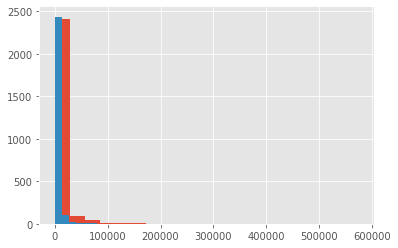

In [37]:
plt.hist(dfc.new_subscribers,bins=20);
plt.hist(dfc.old_subscribers,bins=20)

The first naive attempt does tells us a few things that are helpful in generating a more meaningful plot:

1. Most of the courses are in the lowest bin with much less than 100,000 subscribers
2. There must be some courses with more than 500,000 subscribers listed even though we can not see them on this scale.  Otherwise the x-axis would not extend that far.
3. A log plot may at least make it possible to see these few outliers.
4. Using more histogram bins may help see the details

In [38]:
max_old = max(dfc.old_subscribers)
tot_old = dfc.old_subscribers.sum()
print("max(old_subscribers)={:9.0f} which is{:7.4f}% of {:9.0f}".format(max_old,max_old/tot_old,tot_old))
max_new = max(dfc.new_subscribers)
tot_new = dfc.new_subscribers.sum()
print("max(new_subscribers)={:9.0f} which is{:7.4f}% of {:9.0f}".format(max_new,max_new/tot_new,tot_new))

max(old_subscribers)=   268923 which is 0.0275% of   9777804
max(new_subscribers)=   575132 which is 0.0233% of  24702258


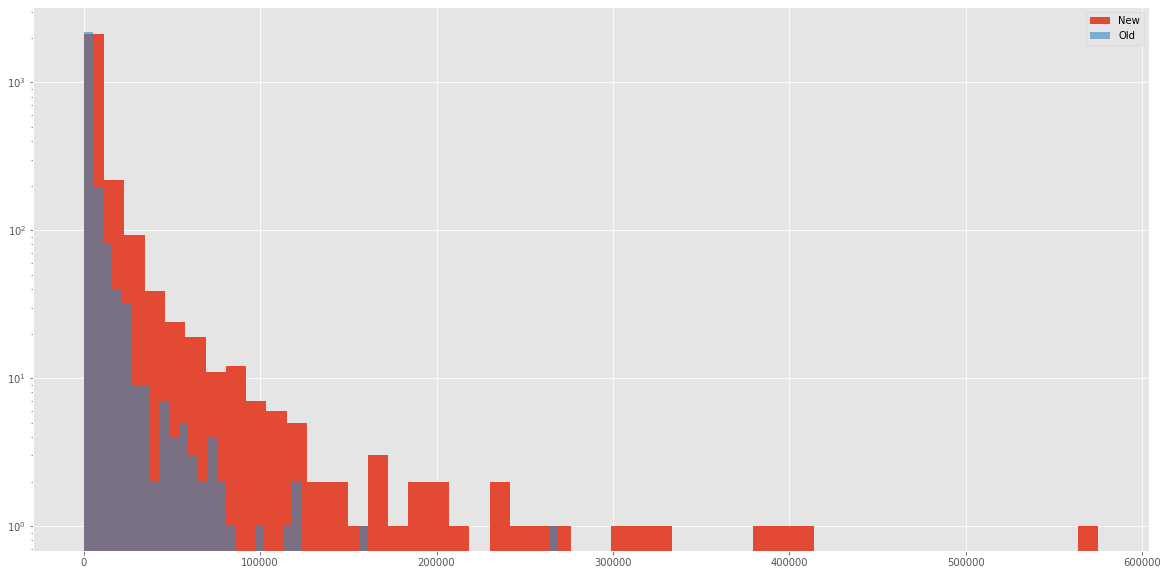

In [39]:
plt.figure(figsize=(20,10))
plt.yscale('log')
plt.hist(dfc.new_subscribers,bins=50, label='New')
plt.hist(dfc.old_subscribers,bins=50, label='Old',alpha=0.6)
plt.legend()
plt.show()


We can now see that there is indeed only one course with more than 500,000 subscribers which is more than 2% of all subscribers in the neww data set.
We also see that there are only a few others with more than 200,000.

For the old data set (in blue/magenta) we see the most popular course had more than 250000 subscribers and the there are only a few courses with more than 80000.

We can not ignore these few outliers because as few as they are, they represent a significant percentage of the total Udemy subscribers (and the corresponding enrollment and possible revenue).  However, we already know that they form their own category and need to be analyzed separately if we want our statistical analysis to have any meaning.

We also know that at this bin resolution, the actual thresholds may be much lower but we can not see the gaps because they are binned together.

Moreover, we can see that the old and the new data are on different scales.
Lets start by normalizing the data by looking at the percetage of Udemy students per course instead of their absolute numbers

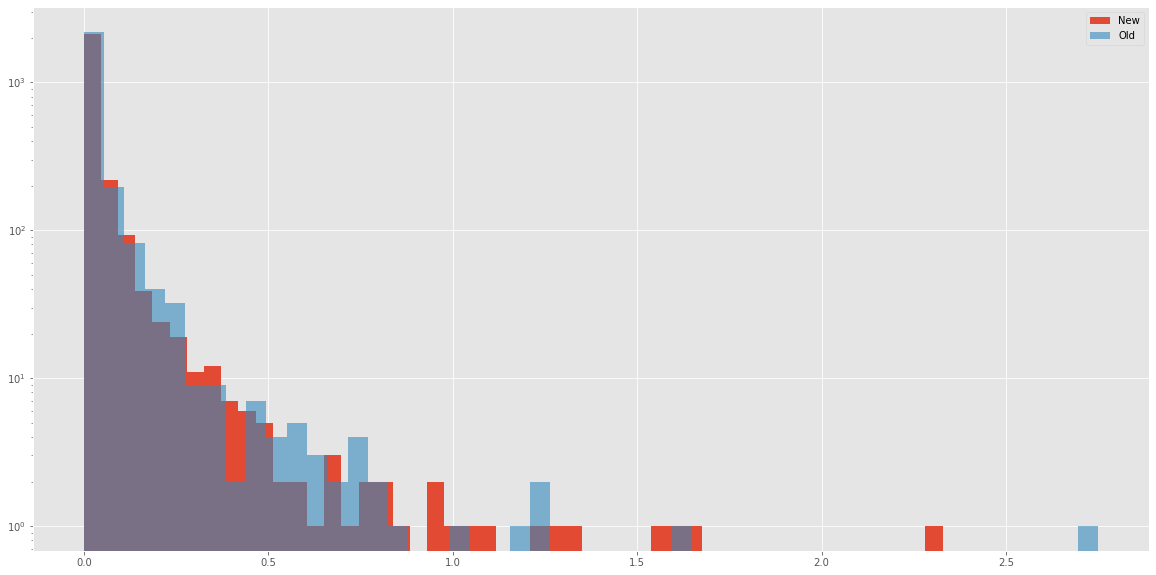

In [40]:
plt.figure(figsize=(20,10))
bin_list=50
plt.hist(100*dfc.new_perc_subs,bins=bin_list, label='New');
plt.hist(100*dfc.old_perc_subs,bins=bin_list, label='Old',alpha=0.6);
plt.yscale('log')
plt.legend()
plt.show()

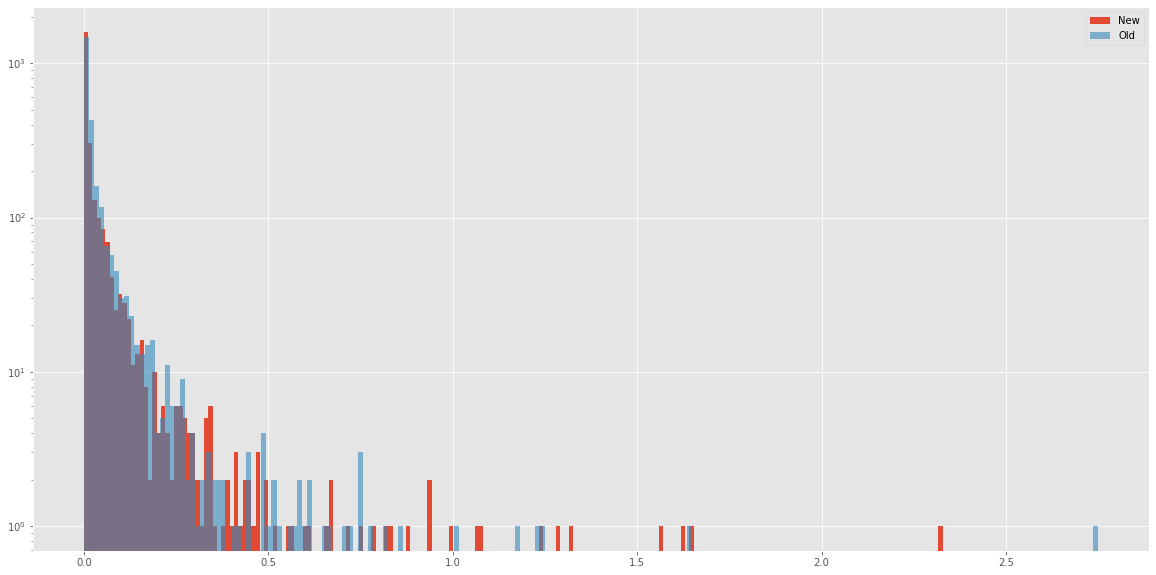

In [41]:
plt.figure(figsize=(20,10))
bin_list=200
plt.hist(100*dfc.new_perc_subs,bins=bin_list, label='New');
plt.hist(100*dfc.old_perc_subs,bins=bin_list, label='Old',alpha=0.6);
plt.yscale('log')
plt.legend()
plt.show()

Now zoom in on the majority of the courses (those with less than 0.5% of students each).


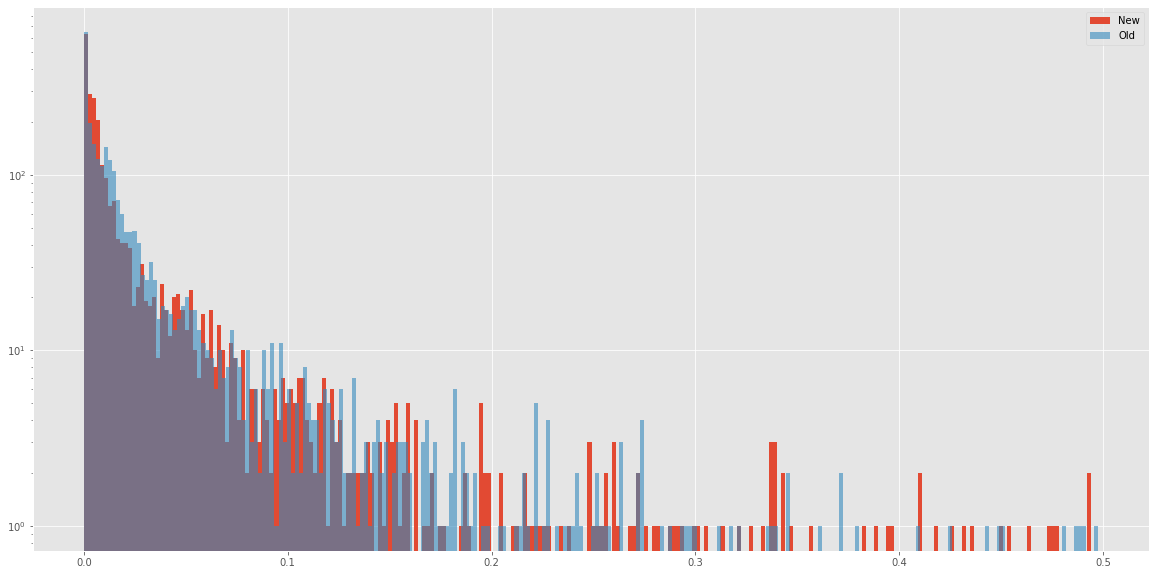

In [42]:
plt.figure(figsize=(20,10))
bin_list=250
plt.hist(100*dfc[dfc.new_perc_subs<0.005].new_perc_subs,bins=bin_list, label='New')
plt.hist(100*dfc[dfc.old_perc_subs<0.005].old_perc_subs,bins=bin_list, label='Old',alpha=0.6)
plt.yscale('log')
plt.legend()
plt.show()

In [43]:
print('{:6.0f} < {:8.1f}, {:f}%'.format(40000, 0.005*tot_old, 40000*100/tot_old))
print('{:6.0f} < {:8.1f}, {:f}%'.format(90000, 0.005*tot_new, 90000*100/tot_new))

 40000 <  48889.0, 0.409090%
 90000 < 123511.3, 0.364339%


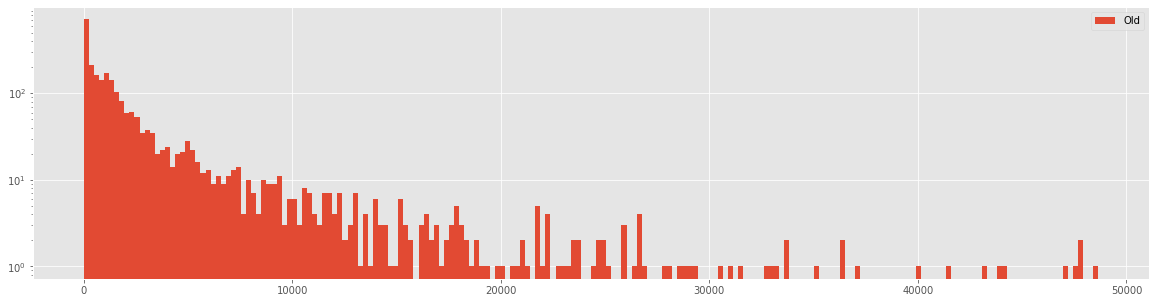

In [44]:
plt.figure(figsize=(20,5))
bin_list=200
plt.hist(dfc.query("old_subscribers< 48889").old_subscribers,bins=bin_list, label='Old');
plt.yscale('log')
plt.legend()
plt.show()

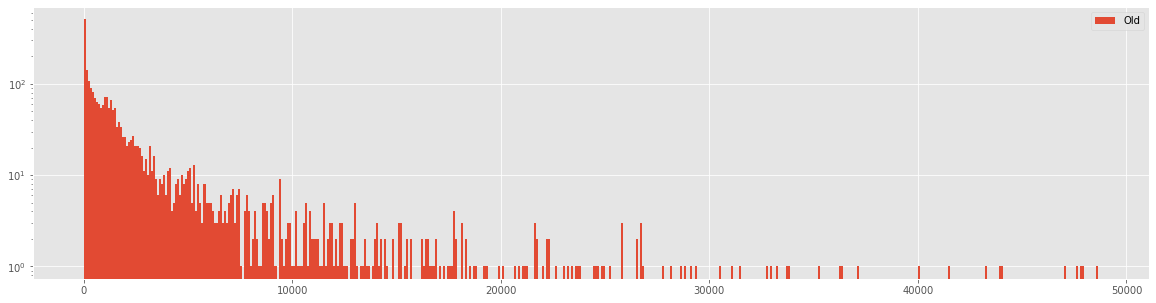

In [45]:
plt.figure(figsize=(20,5))
bin_list=500
plt.hist(dfc.query("old_subscribers< 48889").old_subscribers,bins=bin_list, label='Old');
plt.yscale('log')
plt.legend()
plt.show()

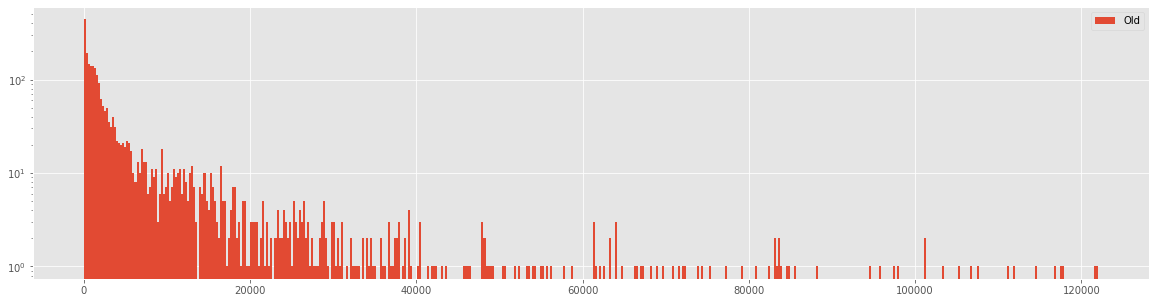

In [46]:
plt.figure(figsize=(20,5))
bin_list=500
plt.hist(dfc.query("new_subscribers< 123511").new_subscribers,bins=bin_list, label='Old');
plt.yscale('log')
plt.legend()
plt.show()

We can now see three distinct regions in the subscriber data:
1. Most courses have less than 0.2% of the subscribers.  This is not surprising - if there we were more than 500 courses with 0.2% of the subscribers - those courses alone would have more than 100% of the subscribers which would be impossible. 

2. The important insight here is that in a sample of several thousand courses the most popular ones have more than 0.2% each and together these few courses account for a disproportionate percentage of the overall subscription base.

2. There is a middle region where a linear fit (on a log scale) might do a reasonable job of approximating the data.  This translates to an exponential decay in the number of subscribers as the number of courses grows.

3. Courses with more than 0.2% of the subscription totals still show a relatively spare distribution  probably belong with the best sellers.
3a. More than 40,000 students per courses in the old data set probably belong with the best sellers.
3b. Courses with more than 90,000 new subscribers probably belong with the best sellers.

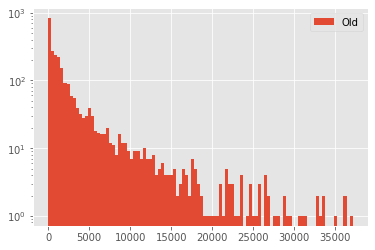

In [47]:
plt.hist(dfc.query("old_subscribers< 40000").old_subscribers,bins=100, label='Old');
plt.yscale('log')
plt.legend()
plt.show()

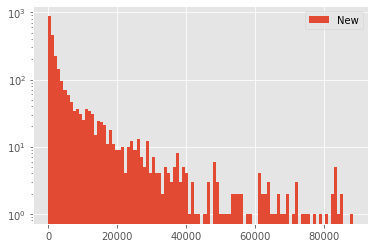

In [48]:
plt.hist(dfc.query("new_subscribers<90000").new_subscribers,bins=100, label='New');
plt.yscale('log')
plt.legend()
plt.show()

Looking for the Low thresholds based on courses with less than 1% of the total student enrollment


In [49]:
dfc[abs(dfc.cum_new_subsc-0.01)<0.0002].sort_values('new_subscribers')

,course_id,title,url,is_paid,old_price,old_subscribers,num_reviews,num_lectures,level,duration,old_pub_date,subject,status,rating1,rating2,rating3,rating4,rating5,rating_tot,new_subscribers,new_pub_date,upd_month,new_price,curr_price,discount,timestamp,old_revenue,new_revenue,hours_watched,price_per_lecture,new_perc_subs,old_perc_subs,cum_old_subsc,cum_new_subsc,new_cat,old_cat
3649,1018530,Cakephp:Creating a CRUD application,https://www.udemy.com/cakephpcreating-a-crud-a...,True,40,803,2,7,All Levels,0.516667,2016-11-22T17:55:42Z,Web Development,OK,2.0,2.0,1.0,0.0,0.0,5.0,817.0,11/2016,44.0,159.99,95.99,40.0,2020-07-09 17:23:07,32120,130711.83,5621,5.714286,0.000033,0.000082,0.026687,0.009811,1,1
3269,1021594,PHP Zend Framework 2:Creating a CRUD Application,https://www.udemy.com/zend-framework-2creating...,True,40,802,6,9,All Levels,0.633333,2016-11-25T01:33:50Z,Web Development,OK,3.0,0.0,1.0,0.0,2.0,6.0,817.0,11/2016,44.0,159.99,95.99,40.0,2020-07-09 16:38:17,32080,130711.83,7218,4.444444,0.000033,0.000082,0.026523,0.009844,1,1
3048,641236,Basic JavaScript: Build 4 Basic JavaScript Pro...,https://www.udemy.com/practical-javascript-jav...,True,40,670,33,37,Beginner Level,4.500000,2016-02-04T03:55:24Z,Web Development,OK,0.0,1.0,16.0,12.0,44.0,73.0,820.0,10/2019,9.0,279.99,167.99,40.0,2020-07-09 16:30:27,26800,229591.80,24790,1.081081,0.000033,0.000069,0.020540,0.009877,1,1
3500,661780,JavaScript Promises: Applications in ES6 and A...,https://www.udemy.com/javascript-promises-appl...,True,75,651,52,20,Beginner Level,2.500000,2015-11-06T19:02:46Z,Web Development,OK,3.0,7.0,9.0,29.0,31.0,79.0,825.0,2/2016,53.0,299.99,179.99,40.0,2020-07-09 17:17:51,48825,247491.75,13020,3.750000,0.000033,0.000067,0.019390,0.009910,1,1
1818,271652,How To Play The Djembe: For Beginners,https://www.udemy.com/how-to-play-the-djembe-f...,True,30,414,18,19,All Levels,1.000000,2014-11-11T05:00:30Z,Musical Instruments,OK,1.0,2.0,8.0,25.0,62.0,98.0,826.0,10/2014,69.0,119.99,71.99,40.0,2020-07-09 14:51:11,12420,99111.74,7866,1.578947,0.000033,0.000042,0.010378,0.009944,1,1
1931,743634,Piano With Willie: Blues n' Boogie Vol. 1,https://www.udemy.com/piano-with-willie-blues-...,True,40,172,26,15,Intermediate Level,2.500000,2016-04-13T05:27:23Z,Musical Instruments,OK,4.0,4.0,7.0,32.0,92.0,139.0,829.0,4/2016,51.0,159.99,95.99,40.0,2020-07-09 15:00:04,6880,132631.71,2580,2.666667,0.000034,0.000018,0.003129,0.009977,1,1
1799,643970,Instant Harmonica - Christmas. Play Jingle Bel...,https://www.udemy.com/instant-harmonica-christ...,True,20,823,11,10,All Levels,0.700000,2015-12-11T18:42:43Z,Musical Instruments,OK,0.0,0.0,0.0,3.0,11.0,14.0,829.0,0/0,NaN,159.99,95.99,40.0,2020-07-09 14:50:23,16460,132631.71,8230,2.000000,0.000034,0.000084,0.027436,0.010011,1,1
1619,987865,Make Patterns in Illustrator,https://www.udemy.com/make-patterns-in-illustr...,True,20,0,0,32,Beginner Level,3.500000,2017-05-25T15:31:11Z,Graphic Design,OK,2.0,1.0,9.0,36.0,123.0,171.0,832.0,2/2020,5.0,79.99,47.99,40.0,2020-07-09 14:43:30,0,66551.68,0,0.625000,0.000034,0.000000,0.000000,0.010045,1,1
1729,502204,Dibujo digital básico: cómo ilustrar en Photoshop,https://www.udemy.com/dibujo-digital-basico-co...,True,20,155,36,90,Beginner Level,5.000000,2016-02-17T23:56:26Z,Graphic Design,OK,13.0,27.0,58.0,80.0,62.0,240.0,832.0,6/2016,49.0,79.99,47.99,40.0,2020-07-09 14:47:41,3100,66551.68,13950,0.222222,0.000034,0.000016,0.002789,0.010078,1,1
2451,42255,Old-Time Banjo for the Absolute Beginner,https://www.udemy.com/old-time-banjo-for-the-a...,True,25,192,21,17,Beginner Level,1.500000,2014-03-12T15:55:49Z,Musical Instruments,OK,2.0,1.0,18.0,31.0,67.0,119.0,832.0,3/2014,76.0,79.99,47.99,40.0,2020-07-09 15:43:59,4800,66551.68,3264,1.470588,0.000034,0.000020,0.003542,0.010112,1,1


In [50]:
cum_new_subsc=np.cumsum(dfc.new_subscribers.sort_values()).reset_index(drop=True)/dfc.new_subscribers.sum()
cum_old_subsc=np.cumsum(dfc.old_subscribers.sort_values()).reset_index(drop=True)/dfc.old_subscribers.sum()

Tentative decision, set low threshold at 10% of all students in each data set  (1700 for old set, 1855 for new set)

In [51]:
tot_new_Web = SubjPiv.new_subscribers[3]
tot_new_Web
#SubjPivloc['Web Development','new_subscribers']

16533000.0

In [52]:
cum_new_subsc_Web=np.cumsum(dfc.query("subject=='Web Development'").new_subscribers.sort_values()).reset_index(drop=True)/SubjPiv.new_subscribers[3]
cum_old_subsc_Web=np.cumsum(dfc.query("subject=='Web Development'").old_subscribers.sort_values()).reset_index(drop=True)/SubjPiv.old_subscribers[3]

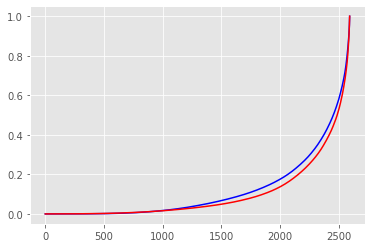

In [53]:
plt.plot(cum_old_subsc,color='blue')
plt.plot(cum_new_subsc,color='red')

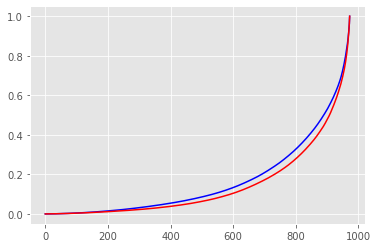

In [54]:
plt.plot(cum_old_subsc_Web,color='blue')
plt.plot(cum_new_subsc_Web,color='Red')

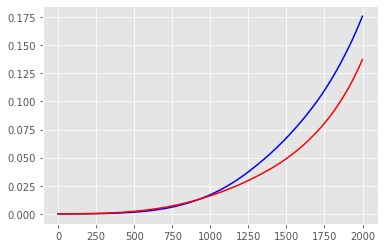

In [55]:
plt.plot(cum_old_subsc[:2000],color='blue')
plt.plot(cum_new_subsc[:2000],color='Red')

In [56]:
cum_new_subsc[1850:1860]

1850    0.099016
1851    0.099225
1852    0.099436
1853    0.099647
1854    0.099859
1855    0.100070
1856    0.100282
1857    0.100494
1858    0.100706
1859    0.100920
Name: new_subscribers, dtype: float64

In [57]:
cum_old_subsc[1700:1710]

1700    0.099939
1701    0.100126
1702    0.100314
1703    0.100502
1704    0.100691
1705    0.100879
1706    0.101068
1707    0.101257
1708    0.101447
1709    0.101636
Name: old_subscribers, dtype: float64

In [58]:
[36/2592,48/2592,1700/2592]

[0.013888888888888888, 0.018518518518518517, 0.6558641975308642]

In [59]:
[44/2592,65/2952,1854/2592]

[0.016975308641975308, 0.022018970189701895, 0.7152777777777778]

In [60]:
dfc.query("old_subscribers>=40000").old_subscribers.sum()/old_subsTot

0.2678368271648726

In [61]:
dfc.query("old_subscribers>=30000").old_subscribers.sum()/old_subsTot

0.30919775033330593

In [62]:
dfc.query("new_subscribers>=90000").new_subscribers.sum()/new_subsTot

0.33529938842028123

In [70]:
dfc.query("new_subscribers>=70000").new_subscribers.sum()/new_subsTot

0.40308266556037103

Questions:
What is the num_subscribers for the course at the threshold (for each data set)?

How do these threshold affect the results in terms of transitions between categories?

How do these thresholds correlate with cumulative revnues?



With the log scale removed, the area under the histogram might tells us something meaningful about the distribution of course sizes.  But we are not there yet ...

We know from the earlier log plot that there are more than 10 courses with at least 30,000 subscribers each that are drowned out by the vertical scale of this plot.

Let's take a closer look at the courses on the lower end of the subscriber numbers that are drowning out our real data.  There may be a large number of these courses but with their low attentance they represent only a small portion of the student population:

sum(old_subscribers<= 2000 ):  1413375
sum(old_subscribers    )=  11715835
Number of courses with old_subscribers<  20:  438
Number of courses with old_subscribers<= 2000 ):  2561
Number of courses                          : 3672


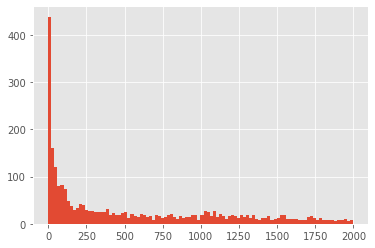

In [64]:
thr = 2000
print("sum(old_subscribers<=",thr,'): ', df.query("old_subscribers<"+str(thr)).old_subscribers.sum())
print("sum(old_subscribers    )= ",                                 df.old_subscribers.sum())
plt.hist(df.query("old_subscribers<@thr").old_subscribers,bins=100);
print("Number of courses with old_subscribers<  20: ",df.query("old_subscribers< 20").shape[0])
print("Number of courses with old_subscribers<=",thr,'): ',df.query("old_subscribers<"+str(thr)).shape[0])
print("Number of courses                          :",                              df.shape[0])


Let's plot the cumulative number of subscribers when we sort the data:

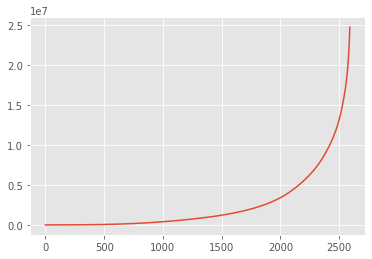

In [65]:
Sorted_subsc = dfc.new_subscribers.sort_values()
cum_subsc=np.cumsum(Sorted_subsc).reset_index(drop=True)
plt.plot(cum_subsc)

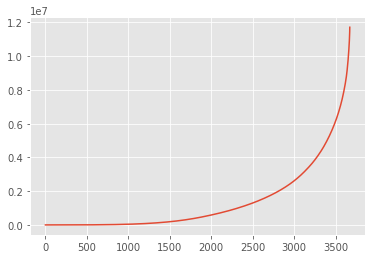

In [72]:
Sorted_subsc = df.old_subscribers.sort_values()
cum_subsc=np.cumsum(Sorted_subsc).reset_index(drop=True)
plt.plot(cum_subsc)

In [73]:
dfc[dfc.old_subscribers>30000].count()

course_id            48
title                48
url                  48
is_paid              48
old_price            48
old_subscribers      48
num_reviews          48
num_lectures         48
level                48
duration             48
old_pub_date         48
subject              48
status               48
rating1              32
rating2              32
rating3              32
rating4              32
rating5              32
rating_tot           32
new_subscribers      48
new_pub_date         48
upd_month            32
new_price            48
curr_price           48
discount             48
timestamp            48
old_revenue          48
new_revenue          48
hours_watched        48
price_per_lecture    48
new_perc_subs        48
old_perc_subs        48
cum_old_subsc        48
cum_new_subsc        48
new_cat              48
old_cat              48
dtype: int64

We see that the lower 3000 courses (about 80% of the courses) have fewer than 25% of the total subscribers.  Most of the subscribers are enrolled in the top 20% of courses (in terms of popularity) - which should not be surprising.  What it does tell us is that we need to be careful in applying statistical tools like averages and medians which are meaningless in this type of data.

In [75]:
piv = (df.pivot_table(index='subject', columns='old_subscribers',values='course_id', aggfunc = 'count')).T
piv

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
old_subscribers,,,,
0,36.0,18.0,11.0,NaN
1,17.0,21.0,11.0,NaN
2,13.0,9.0,5.0,NaN
3,6.0,10.0,10.0,NaN
4,11.0,7.0,8.0,NaN
...,...,...,...,...
114512,NaN,NaN,NaN,1.0
120291,NaN,NaN,NaN,1.0
121584,NaN,NaN,NaN,1.0


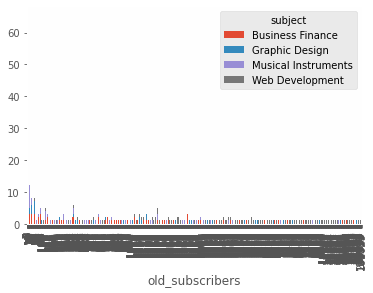

In [76]:
piv.plot(kind='bar',stacked=True)
plt.show()